<a href="https://colab.research.google.com/github/Lossophy/BINA-Projekt/blob/main/import%20git%20-%20Kopie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q xlrd
!git clone https://github.com/Lossophy/BINA-Projekt.git

Cloning into 'BINA-Projekt'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 74 (delta 39), reused 34 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 500.84 KiB | 7.95 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

In [29]:
df = pd.read_csv('/content/BINA-Projekt/Data/ogd115_gest_bilanz.csv')

In [30]:
df.head()

,Jahr,Rubrik,Energietraeger,TJ
0,1980,Bruttoverbrauch,Elektrizität,-29450.0
1,1980,Bruttoverbrauch,Erdölprodukte,321250.0
2,1980,Bruttoverbrauch,Fernwärme,0.0
3,1980,Bruttoverbrauch,Gas,36280.0
4,1980,Bruttoverbrauch,Holzenergie,26280.0


In [40]:
von_jahr_widget = widgets.Dropdown(
    options=sorted(df['Jahr'].unique()),
    description='Jahr:',
    disabled=False,
)

In [41]:
bis_jahr_widget = widgets.Dropdown(
    options=sorted(df['Jahr'].unique()),
    description='Jahr:',
    disabled=False,
)

In [32]:
rubrik_widget = widgets.Dropdown(
    options=df['Rubrik'].unique(),
    description='Rubrik:',
    disabled=False,
)


In [33]:
energietraeger_widget = widgets.Dropdown(
    options=df['Energietraeger'].unique(),
    description='Energietraeger:',
    disabled=False,
)

In [36]:
# Interaktive Funktion definieren
def plot_daten(jahr, rubrik, energietraeger):
    gefiltert = df[(df['Jahr'] == jahr) &
                   (df['Rubrik'] == rubrik) &
                   (df['Energietraeger'] == energietraeger)]

    if gefiltert.empty:
        print("Keine Daten für diese Kombination.")
        return

    plt.figure(figsize=(6,4))
    plt.bar([0], gefiltert['TJ'], tick_label=[f"{jahr}"])
    plt.ylabel('TJ')
    plt.title(f"{rubrik} - {energietraeger} ({jahr})")
    plt.show()

Output()

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

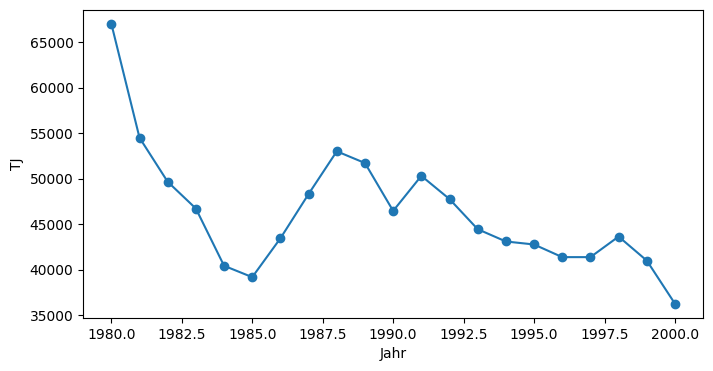

In [37]:
# Interaktive Ansicht verbinden
ui = widgets.VBox([von_jahr_widget, rubrik_widget, energietraeger_widget])
out = widgets.interactive_output(plot_daten, {
    'jahr': von_jahr_widget,
    'rubrik': rubrik_widget,
    'energietraeger': energietraeger_widget
})

display(ui, out)

Output()

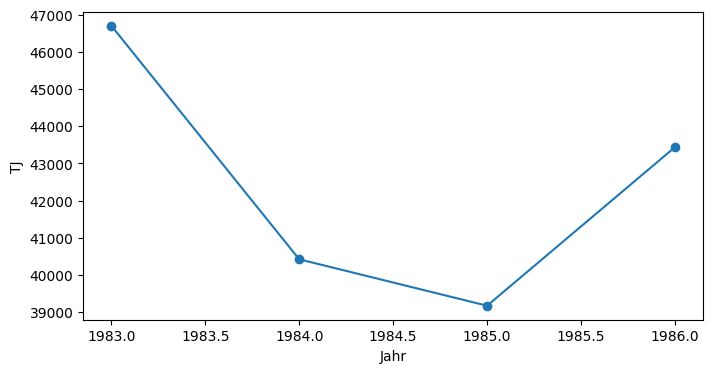

In [48]:
# Plot-Funktion
def plot_daten(von_jahr, bis_jahr, rubrik, energietraeger):
    if von_jahr > bis_jahr:
        print("Fehler: 'Von Jahr' darf nicht größer als 'Bis Jahr' sein.")
        return

    gefiltert = df[(df['Jahr'] >= von_jahr) &
                   (df['Jahr'] <= bis_jahr) &
                   (df['Rubrik'] == rubrik) &
                   (df['Energietraeger'] == energietraeger)]

    if gefiltert.empty:
        print("Keine Daten für diese Auswahl.")
        return

    gruppiert = gefiltert.groupby('Jahr')['TJ'].sum().reset_index()

    plt.figure(figsize=(8, 4))
    plt.plot(gruppiert['Jahr'], gruppiert['TJ'], marker='o')
    plt.xlabel('Jahr')
    plt.ylabel('TJ')
    plt.title(f'{rubrik} - {energietraeger} ({von_jahr}–{bis_jahr})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Anzeige
ui = widgets.VBox([von_jahr_widget, bis_jahr_widget, rubrik_widget, energietraeger_widget])
out = widgets.interactive_output(plot_daten, {
    'von_jahr': von_jahr_widget,
    'bis_jahr': bis_jahr_widget,
    'rubrik': rubrik_widget,
    'energietraeger': energietraeger_widget
})
clear_output()
display(ui, out)
